In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import itertools as it
import math

In [2]:
import sys 
import os
sys.path.append(os.path.abspath("../agents/"))
from world import World 

### The "Base" agent 
The new base class can take three new parameters:

"prediction", --> sigmoid, chaos

"behavior", --> sigmoid, chaos

and "attention" --> static, entropy

In [3]:
world = World(state_size =50, time =500, agent=["base", "base"], seed=7, attention=["entropy", "entropy"])

world.create_agents()
world.run()
agents = world.get_agents()
error = world.get_avg_abs_error()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
predictability = world.get_predictability()
#world.print_results()
time = [t for t in range(len(costs[0]))]

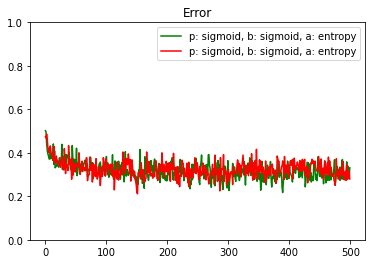

In [4]:
plt.figure(facecolor='white') 
plt.plot(time, error[0], 'g', label=agents[0])
plt.plot(time, error[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Error")
plt.show()

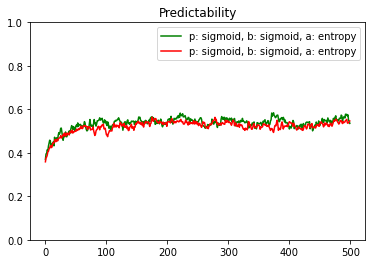

In [5]:
plt.figure(facecolor='white') 
plt.plot(time, predictability[0], 'g', label=agents[0])
plt.plot(time, predictability[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Predictability")
plt.show()

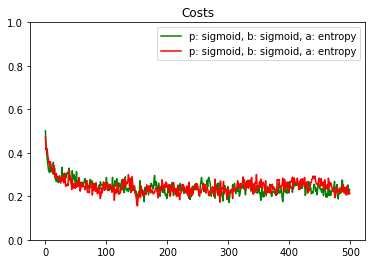

In [6]:
plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Costs")
plt.show()

In [7]:
world = World(state_size =50, time =500, agent=["base", "base"], prediction=["chaos", "chaos"], behavior=["sigmoid", "sigmoid"], seed=7)

world.create_agents()
world.run()
agents = world.get_agents()
error = world.get_avg_abs_error()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
predictability = world.get_predictability()
#world.print_results()
time = [t for t in range(len(costs[0]))]

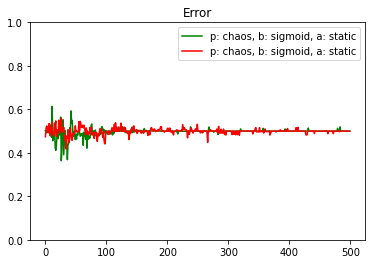

In [8]:
plt.figure(facecolor='white') 
plt.plot(time, error[0], 'g', label=agents[0])
plt.plot(time, error[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Error")
plt.show()

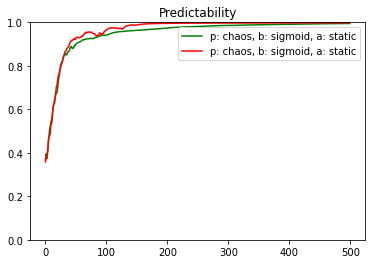

In [9]:
plt.figure(facecolor='white') 
plt.plot(time, predictability[0], 'g', label=agents[0])
plt.plot(time, predictability[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Predictability")
plt.show()

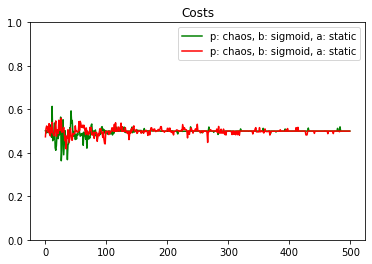

In [10]:
plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Costs")
plt.show()